# Aula 15 - Teorema Central do Limite

**Preparo Prévio:**
1. Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 238 a 244).
2. Montgomery. Estatística Aplicada e Probabilidade para Engenheiros: Seção 7.2

In [1]:
%matplotlib inline
%reset -f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, uniform



## Estatísticas e distribuições amostrais

Uma **estatística** é qualquer função baseada nas observações de uma amostra aleatória. Usamos estatísticas quando, para fins práticos, não é possível ter acesso a toda uma população

A distribuição de probabilidades e uma estatística é chamada de *distribuição amostral*

## Distribuição amostral da média

Sejam:

$X, X_1, X_2, \cdots, X_n$ amostras aleatórias de tamanho $n$, a distribuição de $\overline{X}$ definida como:

$$\overline{X} = \frac{X_1 + X_2 + X_3 + \cdots + X_n}{n}$$

É chamada *distribuição amostral da média*

Pode-se caracterizar a distribuição amostral da média como:

$$\mu_{\overline{X}} = \frac{\mu + \mu + \cdots + \mu}{n} = \mu$$

E a variância:

$$\sigma^2_{\overline{X}} = \frac{\sigma^2 + \sigma^2 + \cdots + \sigma^2}{n^2} = \frac{\sigma^2}{n}$$

## Teorema  central do limite

Se $X_1, X_2, \cdots, X_n$ é uma amostra aleatória de tamanho $n$ extraída de uma população com média $\mu$ e variância $\sigma^2$ e $\overline{X}$ é a distribuição da média amostral, a forma limite da distribuição:

$$Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}}$$

é a **distribuição normal**, à medida que $n  \rightarrow \infty$


### Exemplo 1

Fonte: Exemplo 7-1 Montgomery

Uma companhia de eletrônicos fabrica resistores que têm uma resistência média de $100 \Omega$ e um desvio padrão de $10 \Omega$. A distribuição da resistência é normal.

Encontre a probabilidade de que uma amostra aleatória de $n = 25$ resistores tenha resistência média menor que $95 \Omega$ .

Temos:

$\sigma_\overline{X} = \frac{\sigma}{\sqrt{n}} = \frac{10}{\sqrt{25}} = 2$

Devemos achar o valor à esquerda do ponto $\overline{X} = 95$. Temos então:

$z = \frac{95 - 100}{2} = -2.5$

Portanto:

$$P(\overline{X} < 95) = P(Z < 2.5)$$

$$=0.0062$$

Poderíamos também ter feito:


In [2]:
norm.cdf(95, loc=100, scale=2)

0.006209665325776132

### Exemplo 2

Suponha que a variável aleatória $X$ tem distribuição contínua uniforme:

$$f(x) = 1/2, 4 \leq x \leq 6$$
caso contrário:
$$f(x) = 0$$

Apresente a distribuição da média amostral de uma amostra aleatória de tamanho $n = 40$

Das propriedades da distribuição uniforme temos:

$$\mu = \frac{a + b}{2} = 5$$

$$\sigma^2 = \frac{(b - a)^2}{12} = \frac{1}{3} $$

Portanto:

$$\sigma^2_{\overline{X}} = \frac{\sigma^2}{n} = \frac{1}{3*40} = \frac{1}{120}$$

Temos, portanto, que:

$$ \overline{X} \sim Normal(5, 1/120)$$

Podemos chegar ao mesmo resultado via simulação, e observar o TLC


In [3]:
n = 40 # tamanho da amostra
total = 1000 # número de amostras
size = (total, n)
a = 4
b = 6

Vamos gerar 1000 amostras de tamanho 40, que ficarão guardadas numa matriz $1000x40$:

In [4]:
# Gerando as diversas amostras
X = uniform.rvs(loc = a, scale = (b - a), size = size)

In [5]:
X.shape

(1000, 40)

Agora vamos somar cada uma das 1000 linhas e dividir por $n$ para acharmos as médias de cada amostra:

In [6]:
X_ = np.sum(X, axis=1)
X_ = X_/n

In [7]:
X_.shape

(1000,)

(array([  6.,  25.,  93., 147., 227., 225., 172.,  70.,  26.,   9.]),
 array([4.72188815, 4.77748036, 4.83307257, 4.88866478, 4.94425699,
        4.99984921, 5.05544142, 5.11103363, 5.16662584, 5.22221805,
        5.27781026]),
 <a list of 10 Patch objects>)

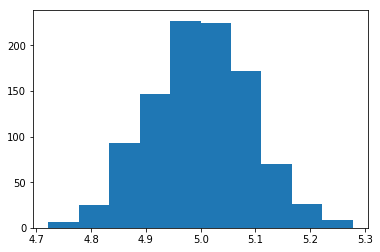

In [8]:
plt.hist(X_)

Agora vamos verificar a média e a variância das amostras:

In [9]:
np.mean(X_), np.var(X_, ddof=0)

(4.9991765596352815, 0.008529679684677752)

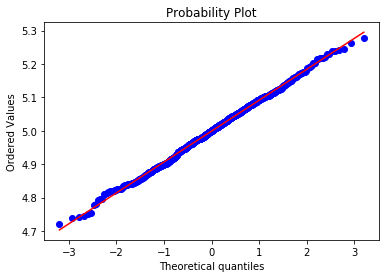

In [10]:
from scipy.stats import probplot

probplot(X_, dist="norm", plot=plt);

Notemos que o resultado se aproxima do teórico

### Exercícios



**1** (Montgomery 7-3). Tubos de PCV têm um diâmetro médio de $1.01 in$ e um desvio padrão de $0.003 in$. Encontre a probabilidade de que uma amostra aleatória de  $n = 9$  seções do tubo tenham um diâmetro médio de amostra maior que $1.009 in$ e menor que $1.012 in$.


**2** (Montgomery Ex. 7-3)

A vida útil de um componente usado em turbinas de jatos é uma variável aleatória com média $5000 h$ e desvio padrão de $40 h$. A distribuição de vida útil é bem próxima de uma normal.

O fabricante introduz uma mudança no processo de manufatura deste componente e aumenta a média para $5050 h$ e diminui o desvio padrão para $30 h$. Suponha que uma amostra aleatória de $n_1 = 16$ componentes é selecionada do processo "antigo" e que uma amostra aleatória de $n_2 = 25$ componentes é selecionada do processo "melhorado". Qual a probabilidade que a diferença entre as duas amostras signifique que $\overline{X}_2 = \overline{X}_1$ seja de pelo menos 25 horas? Assuma que os processos novos e velhos possam ser considerados populações independentes. 

Resolva usando conhecimentos de distribuição de $\overline{X}$ e também via simulação.



In [11]:
## Faça aqui a simulação do Ex. 2

**3.** Abra o notebook [Aula15_TLC_interativo.ipynb](Aula15_TLC_interativo.ipynb) e realize as seguintes atividades:
1. Varie o tamanho de n
2. Explique o que acontece com o probplot à medida que se varia o tamanho de n
